features: ['snow_depth_water_equivalent_mean', 'surface_net_solar_radiation_mean', 'surface_net_thermal_radiation_mean', 'surface_pressure_mean', 'temperature_2m_mean', 'dewpoint_temperature_2m_mean', 'u_component_of_wind_10m_mean', 'v_component_of_wind_10m_mean', 'volumetric_soil_water_layer_1_mean', 'volumetric_soil_water_layer_2_mean', 'volumetric_soil_water_layer_3_mean', 'volumetric_soil_water_layer_4_mean', 'snow_depth_water_equivalent_min', 'surface_net_solar_radiation_min', 'surface_net_thermal_radiation_min', 'surface_pressure_min', 'temperature_2m_min', 'dewpoint_temperature_2m_min', 'u_component_of_wind_10m_min', 'v_component_of_wind_10m_min', 'volumetric_soil_water_layer_1_min', 'volumetric_soil_water_layer_2_min', 'volumetric_soil_water_layer_3_min', 'volumetric_soil_water_layer_4_min', 'snow_depth_water_equivalent_max', 'surface_net_solar_radiation_max', 'surface_net_thermal_radiation_max', 'surface_pressure_max', 'temperature_2m_max', 'dewpoint_temperature_2m_max', 'u_co

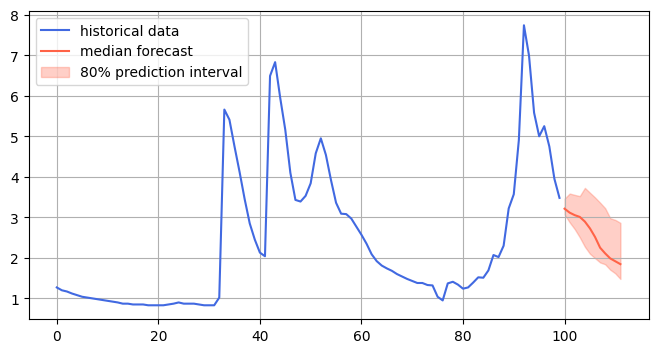

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("./data/camels_01022500.csv")[:100]
# df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

features = [c for c in df.columns if c not in ["date"]]

print("features:", features)

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df['streamflow'])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["streamflow"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()
